In [15]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

import pandas as pd
list_age = ['계','19~44','45~64','65~74','75 이상']
list_sex = ['계','남','여']
idx_sex = []
idx_age = []
idx_topic = []
value = []
i1 =''
for z in range(9,10):
    for i in list_age:
        for j in list_sex:
            data1 = pd.read_csv('../../raw/통합 테이블(공원)_2019.csv')
            data2 = pd.read_csv('../../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
            data2.rename(columns={'지역':'자치구'},inplace = True)
            df2 = data2[data2['연령별'] == i]
            df2 = df2[df2['성별'] == j]
            df2.set_index('자치구',inplace = True)
            data1.set_index('자치구',inplace = True)
            df = pd.concat([df2,data1],axis=1)
            df = df.drop(df.index[0])
            df = df.drop(['연령별','성별'],axis=1)
            df1 = df[[df.columns[z],'1인당 생활권 도시림 면적']]
            corr = df1.corr()
            value.append(corr.iloc[0][1])
            idx_age.append(i)
            idx_sex.append(j)
            idx_topic.append(df.columns[z])

,1인당 연소득,주관적 건강수준,걷기 실천,격렬한 신체활동 실천,긍정적 태도율(자연환경),주관적 스트레스 수준,우울감 경험률,중등도 신체활동 실천,체중조절 경험 여부,행복감 지수,...,행정구역면적,공원면적,공원율,1인당 공원 면적,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적,1인당 생활권 도시림 면적(산림수목),1인당 생활권 도시림 면적(공원녹지)
자치구,,,,,,,,,,,,,,,,,,,,,
영등포구,1153.8,11.4,44.1,0.0,68.8,11.4,2.9,8.0,48.6,7.29,...,"24,548,520","3,050,378",12.43,7.6,2.558024e+06,2.525751e+06,6.957240,6.869465,5.186060,1.683405
양천구,1487.1,26.1,45.7,4.3,91.3,2.2,6.5,8.7,47.8,7.05,...,"17,405,710","2,912,035",16.73,6.3,3.659173e+06,1.860690e+06,7.986583,4.061179,0.794295,3.266884
마포구,1334.4,21.1,49.1,1.8,81.5,26.3,5.3,14.0,49.1,6.89,...,"23,851,343","4,440,002",18.62,11.5,3.977250e+06,3.956310e+06,10.633363,10.577379,3.961346,6.616033
동작구,1089.3,8.3,43.3,1.7,70.7,21.7,20.0,5.0,36.7,6.35,...,"16,354,618","4,584,220",28.03,11.2,3.862343e+06,2.338377e+06,9.754303,5.905544,0.826446,5.079098
금천구,1143.2,12.8,46.8,4.3,64.4,34.0,14.9,4.3,40.4,5.74,...,"13,020,260","2,206,213",16.94,8.8,3.126930e+06,4.139500e+05,13.431253,1.778059,1.399532,0.378528
구로구,1109.9,10.4,43.8,0.0,75.6,20.8,12.5,0.0,35.4,5.98,...,"20,120,106","3,336,138",16.58,7.6,3.432140e+06,1.325089e+06,8.439744,3.258437,1.496934,1.761503
관악구,999.5,25.0,45.8,2.1,85.1,20.8,8.3,4.2,37.5,7.53,...,"29,568,929","10,976,868",37.12,21.2,1.583360e+07,5.399620e+05,31.661242,1.079721,0.564860,0.514861
강서구,1076.2,19.6,41.3,4.3,88.6,26.1,4.3,8.7,41.3,6.73,...,"41,436,853","4,370,320",10.55,7.3,8.294106e+06,4.322172e+06,14.015144,7.303483,1.700300,5.603183
중랑구,1433.8,15.4,51.9,7.7,67.3,32.7,10.0,1.9,21.2,7.04,...,"18,496,071","5,205,284",28.14,12.9,6.274698e+06,1.477730e+06,15.804687,3.722101,0.259189,3.462912


Index(['1인당 연소득', '주관적 건강수준', '걷기 실천', '격렬한 신체활동 실천', '긍정적 태도율(자연환경)',
       '주관적 스트레스 수준', '우울감 경험률', '중등도 신체활동 실천', '체중조절 경험 여부', '행복감 지수', '공원 수',
       '행정구역면적', '공원면적', '공원율', '1인당 공원 면적', '총 도시림 면적', '생활권 도시림 면적',
       '1인당 총 도시림 면적', '1인당 생활권 도시림 면적', '1인당 생활권 도시림 면적(산림수목)',
       '1인당 생활권 도시림 면적(공원녹지)'])

In [10]:
df_final = pd.DataFrame({'주관적 건강수준':value, '주제':idx_topic,'연령별':idx_age,'성별':idx_sex})

df_final = df_final.set_index(['주제','연령별','성별'])

df_final.reset_index(inplace = True)
df_final

,주제,연령별,성별,주관적 건강수준
0,행복감 지수,계,계,0.342430
1,행복감 지수,계,남,0.374804
2,행복감 지수,계,여,0.291509
3,행복감 지수,19~44,계,0.311668
4,행복감 지수,19~44,남,0.269685
5,행복감 지수,19~44,여,0.276416
6,행복감 지수,45~64,계,0.285171
7,행복감 지수,45~64,남,0.285615
8,행복감 지수,45~64,여,0.258817
9,행복감 지수,65~74,계,0.258992


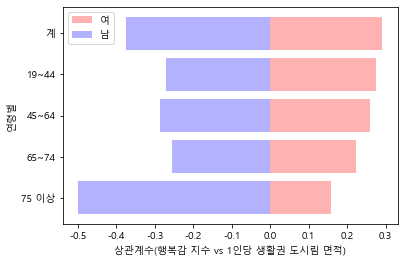

In [12]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


women = np.array(df_final[df_final['성별']=='여']['주관적 건강수준'])[::-1]

men = np.array(df_final[df_final['성별']=='남']['주관적 건강수준'])[::-1]

x = ['75 이상','65~74','45~64','19~44','계']



plt.barh(x, women, color="r", alpha = 0.3)

plt.barh(x, -men, color="b",alpha = 0.3)
plt.legend(['여','남'])
plt.xlabel('상관계수(행복감 지수 vs 1인당 생활권 도시림 면적)')
plt.ylabel('연령별')

plt.show()

In [362]:

import pandas as pd


C:\Users\gimhu\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,_주관적_스트레스_수준,_1인당생활권도시림면적
_주관적_스트레스_수준,1.000000,0.062178
_1인당생활권도시림면적,0.062178,1.000000


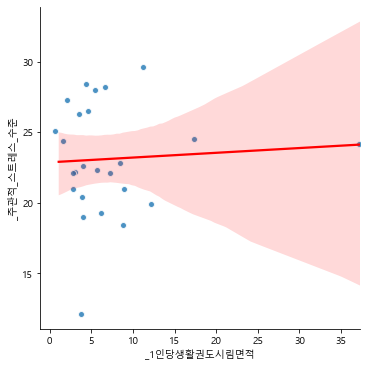

In [363]:
sns.lmplot(x="_1인당생활권도시림면적", y='_'+ df.columns[z].replace(' ','_'), data=df1, line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)